In [4]:


import warnings
warnings.filterwarnings('ignore')

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import fbprophet
from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import time


In [5]:

#load data.
df = pd.read_csv('issues.csv')
df


,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
0,1,Requirements,Coding,Bug,Critical,Approved,2/24/2017,NaN,Smith
1,2,Design,Testing,Enhancement,High,Approved,2/25/2017,NaN,Roy
2,3,Requirements,Design,Inquiry,Low,Rejected,2/26/2017,3/7/2017,Linda
3,4,Testing,Field,Bug,High,Completed,2/27/2017,3/8/2017,Kim
4,5,Documentation,Field,Enhancement,Major,pendingReview,2/28/2017,NaN,James
...,...,...,...,...,...,...,...,...,...
1995,1996,Design,Coding,Inquiry,Low,Rejected,6/6/2017,8/4/2017,Zachary
1996,1997,Testing,Field,Bug,Medium,Completed,6/7/2017,NaN,Tamara
1997,1998,Documentation,Field,Enhancement,Major,Rejected,6/8/2017,NaN,Eric
1998,1999,Design,Coding,Inquiry,High,pendingReview,4/14/2017,NaN,Lindsey


In [6]:
df.tail()

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
1995,1996,Design,Coding,Inquiry,Low,Rejected,6/6/2017,8/4/2017,Zachary
1996,1997,Testing,Field,Bug,Medium,Completed,6/7/2017,NaN,Tamara
1997,1998,Documentation,Field,Enhancement,Major,Rejected,6/8/2017,NaN,Eric
1998,1999,Design,Coding,Inquiry,High,pendingReview,4/14/2017,NaN,Lindsey
1999,2000,Design,Coding,Inquiry,High,Completed,6/10/2017,NaN,John


<AxesSubplot:xlabel='created_at'>

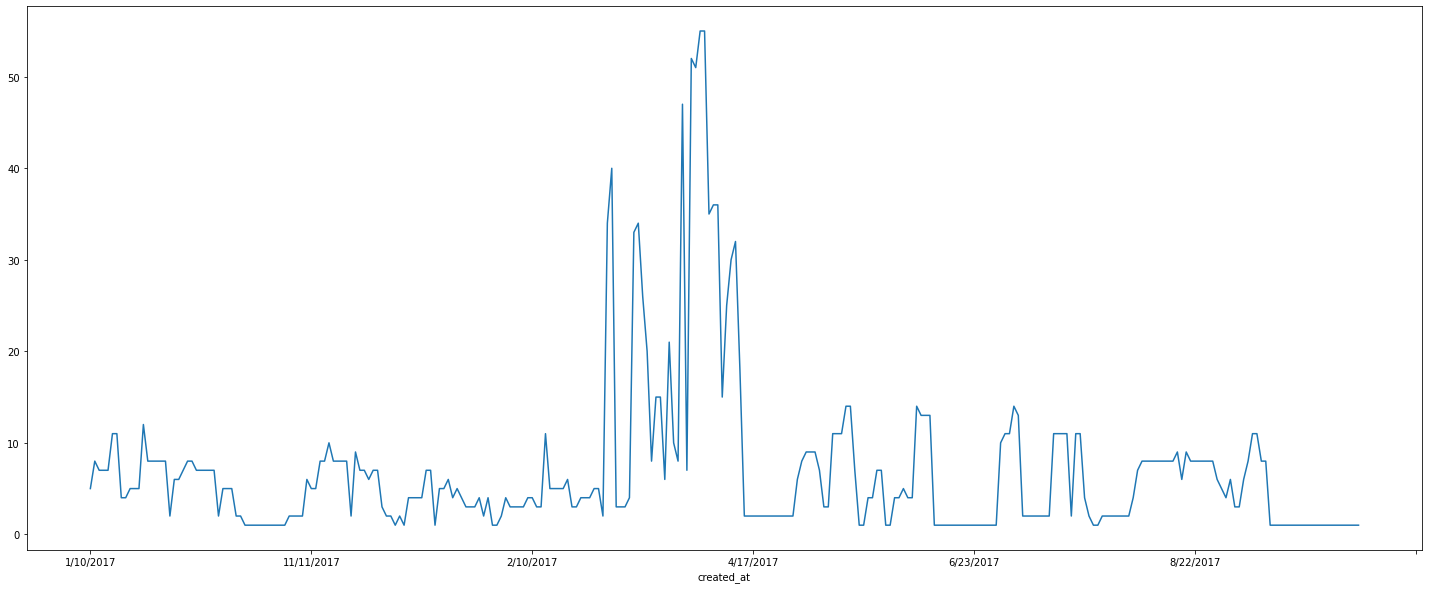

In [7]:
DailyIssue = df.groupby(['created_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))
#Data = DataFrame(DailyIssue)

In [8]:
df1 = df.groupby(['created_at'], as_index = False).count()
dataFrame = df1[['created_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

In [9]:
#facebook prophet
dataFrame = pd.read_csv('github_data.csv')
m = Prophet()
m.fit(dataFrame)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
#facebook
#make predict
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
648,2018-12-18
649,2018-12-19
650,2018-12-20
651,2018-12-21
652,2018-12-22


In [11]:
#facebook prophet
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
648,2018-12-18,-8.736755,-19.313662,1.104947
649,2018-12-19,-8.929065,-19.315601,2.015612
650,2018-12-20,-8.640544,-18.709798,2.104296
651,2018-12-21,-8.546741,-18.575545,1.460436
652,2018-12-22,-9.360859,-19.329238,2.018898


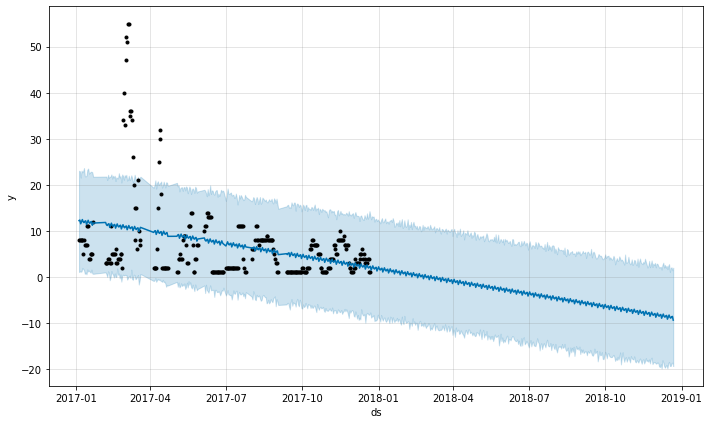

In [12]:
#facebook prophet
forcast_fig1 = m.plot(forecast)

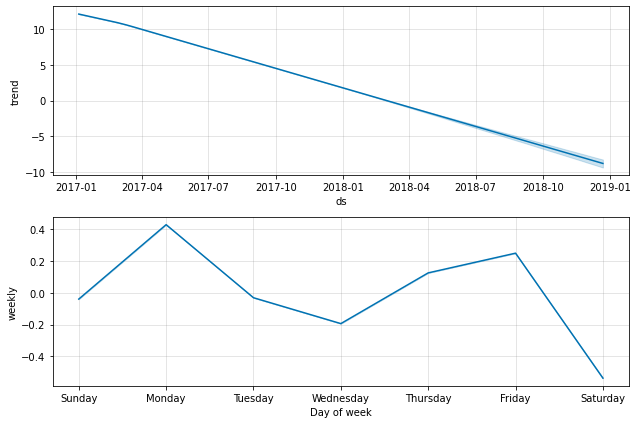

In [13]:
#Q1 : The day of the week maximum number of issues ceated : Monday

forcast_fig2 = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


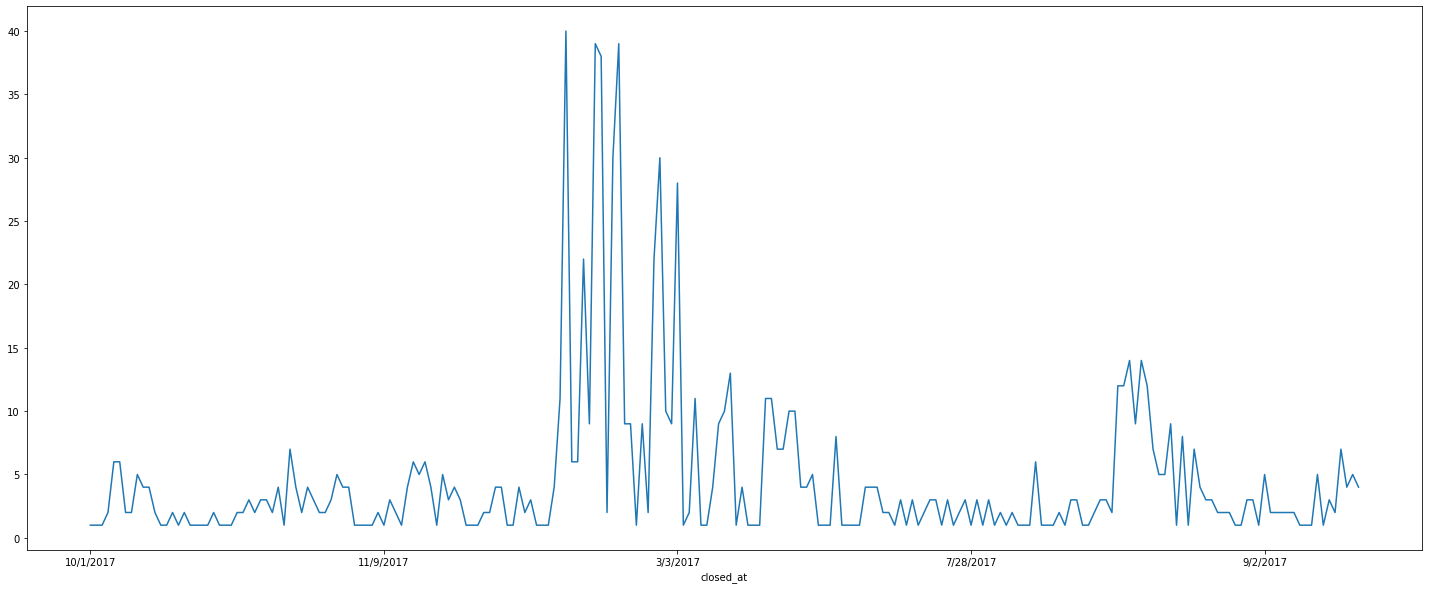

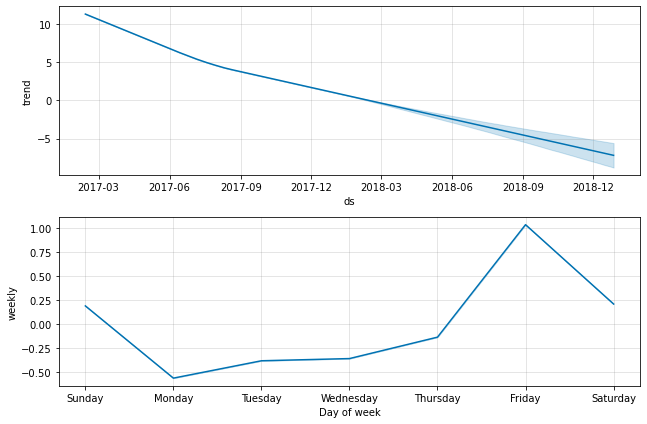

In [14]:
# Q2 : The day of the week maximum number of issues closed 

# and

# Q3 : The month of the year that has maximum number of issues closed

DailyIssue = df.groupby(['closed_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

df1 = df.groupby(['closed_at'], as_index = False).count()
dataFrame = df1[['closed_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

dataFrame = pd.read_csv('github_data.csv')
m = Prophet()
m.fit(dataFrame)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forcast_fig2 = m.plot_components(forecast)


In [15]:
# answer 2 : day when maximum issues were closed is Friday

# answer 3 : Maximum issues were closed in March - 2017.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


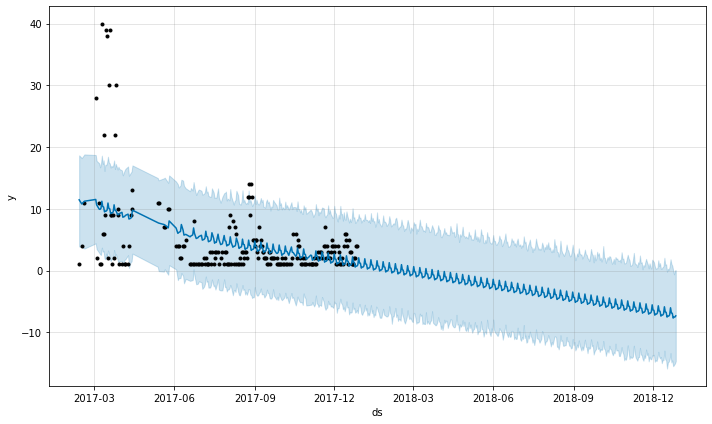

In [16]:
# Q4 : Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe. 


model = fbprophet.Prophet()
model.fit(dataFrame)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot = model.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


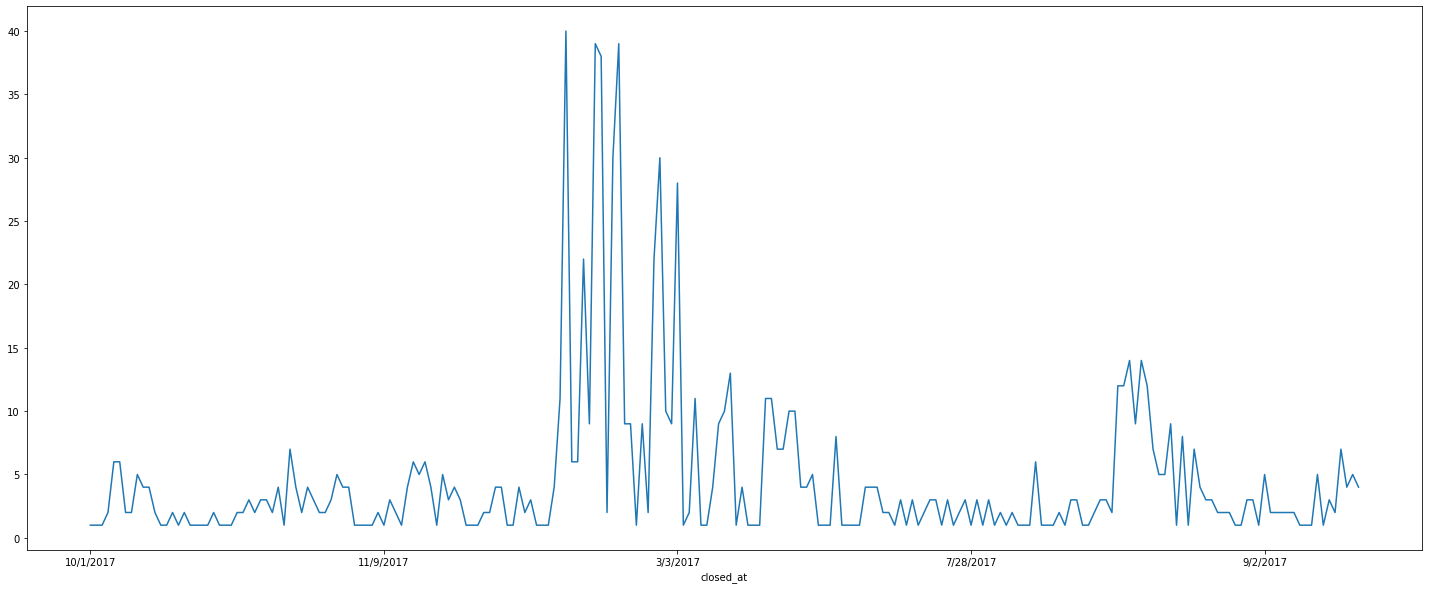

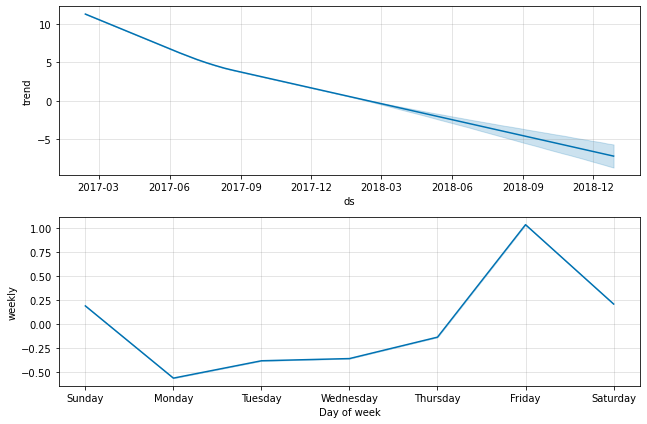

In [17]:
#5. Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll
# see the trend, yearly seasonality, and weekly
# seasonality of the time series. If you include holidays, you’ll see those here, too. 

DailyIssue = df.groupby(['closed_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

df1 = df.groupby(['closed_at'], as_index = False).count()
dataFrame = df1[['closed_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

dataFrame = pd.read_csv('github_data.csv')
m = Prophet()
m.fit(dataFrame)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forcast_fig2 = m.plot_components(forecast)

#answer 5